In [1]:
import numpy as np

class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros((n_classes), dtype=np.float64)

        for c in self._classes:
            X_c = X[c==y]
            self._mean[c,:] = X_c.mean(axis=0)
            self._var[c, :] = X_c.var(axis=0)
            self._priors[c] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return y_pred

    def _predict(self, x):
        posteriors = []
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-(x-mean)**2 / (2 * var))
        denominator = np.sqrt(2*np.pi * var)
        return numerator / denominator

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [6]:
df.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.097500,3.425000,0.475000
std,61.427464,0.633868,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


<AxesSubplot:>

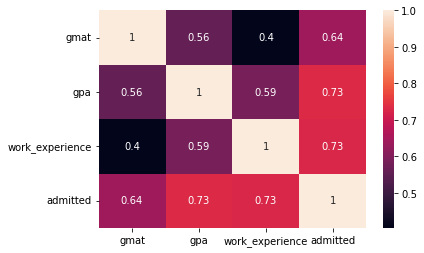

In [174]:
sns.heatmap(df.corr(),annot=True)

In [175]:
X = df.drop('admitted',axis=1)
y = df['admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [176]:
nb = NaiveBayes()

In [177]:
nb.fit(X_train,y_train)

# PREDICTIONS (TRAIN)

In [188]:
arr1 = X_test.to_numpy()
predictions = nb.predict(arr1)
print(predictions)

[0, 0, 0, 1, 1, 1, 0, 0, 1, 0]


In [186]:
print(y_test.to_numpy())

[0 0 0 1 0 1 0 0 1 0]


In [204]:
print('=======================================')

print('ACCURACY SCORE')
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

print('=======================================')

print("CLASSIFICATION REPORT")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

print('=======================================')

print('CONFUSION MATRIX')
print(confusion_matrix(y_test,predictions))

print('=======================================')

ACCURACY SCORE
0.9
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10

CONFUSION MATRIX
[[6 1]
 [0 3]]


# TRUE POSITIVE = 6

# TRUE NEGATIVE = 1

# FALSE POSITIVE = 1

# FALSE NEGATIVE = 0

# ================================================================

# TEST DATA

In [190]:
test = pd.read_csv('test.csv')

In [191]:
test.head()

,gmat,gpa,work_experience
0,590,2.0,3
1,740,3.7,4
2,680,3.3,6
3,610,2.3,1
4,710,3.0,5


In [193]:
arr2 = test.to_numpy()
test_predictions = nb.predict(arr2)

# TEST DATA PREDICTIONS

In [194]:
test_predictions

[0, 1, 1, 0, 1]

In [199]:
finalresults = pd.concat([test, pd.DataFrame(test_predictions,columns={'predicted'})],axis=1)
finalresults

,gmat,gpa,work_experience,predicted
0,590,2.0,3,0
1,740,3.7,4,1
2,680,3.3,6,1
3,610,2.3,1,0
4,710,3.0,5,1
